In [100]:
!pip install pandas 

In [101]:
import numpy as np # linear algebra
import pandas as pd # (data preprocessing,CSV file I/O (e.g) pd.read_csv)
import os
import gc
import re
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [102]:
train = pd.read_csv('info_train.csv')
test = pd.read_csv('info_test.csv')
sub = pd.read_csv('sample_submission.csv')

datasrc = pd.read_csv('datasources.csv')
cdtrain = pd.read_csv('codes_train.csv')
cdtest = pd.read_csv('codes_test.csv')
train

,notebook_id,date_evaluated,tier,total_execution_time
0,eca89c0554,2022-04-08T07:47:07.470Z,MASTER,5573.173455
1,021bbc7ee2,2022-08-02T09:49:22.587Z,CONTRIBUTOR,152.800169
2,a2137a2ae8,2022-04-28T06:09:43.927Z,EXPERT,3110.543580
3,a655fbe4b8,2022-02-06T05:44:17.220Z,CONTRIBUTOR,74.077047
4,1b318124e3,2021-09-23T00:27:19.700Z,NaN,13.374717
...,...,...,...,...
2953,87db7e7138,2022-08-04T03:53:21.637Z,CONTRIBUTOR,38.732182
2954,1ff1de7740,2022-08-14T09:49:15.753Z,CONTRIBUTOR,1268.031509
2955,6492d38d73,2020-12-13T17:02:32.010Z,NaN,348.246678
2956,8216124282,2021-09-30T17:11:49.553Z,CONTRIBUTOR,296.508680


In [103]:
datasrc

,notebook_id,file_name,total_columns,total_rows,file_extension,file_size
0,cfcd208495,Breast_Cancer,16.0,4024.0,.csv,396119.0
1,c4ca4238a0,sample_submission,4.0,64.0,.csv,1914.0
2,c4ca4238a0,train,4.0,11218.0,.csv,471056.0
3,c4ca4238a0,tf_efficientnet_b5_ap-456,NaN,NaN,.pt,114218400.0
4,c4ca4238a0,timm,NaN,NaN,.tgz,22647078.0
...,...,...,...,...,...,...
48183,bcfa8a783a,train,82.0,21263.0,.csv,23859780.0
48184,f1920129f9,gender_submission,2.0,418.0,.csv,3258.0
48185,f1920129f9,test,11.0,418.0,.csv,28629.0
48186,f1920129f9,train,12.0,891.0,.csv,61194.0


In [104]:
cdtest

,notebook_id,code_cell,source
0,c4ca4238a0,0,!mkdir -p ../work\n\n!cd ../work && tar xfz .....
1,c4ca4238a0,1,import os\n\nimport numpy as np\n\nimport pand...
2,c4ca4238a0,2,debug = True\n\nif debug:\n\n epochs = 3\n\...
3,c4ca4238a0,3,"df = pd.read_csv(""../input/dfl-bundesliga-data..."
4,c4ca4238a0,4,def extract_training_images(args):\n\n ...
...,...,...,...
52752,6562c5c1f3,16,"train, test = train_test_split(scaled_data, te..."
52753,6562c5c1f3,17,residual = pd.DataFrame(model_fit.resid)\n\nre...
52754,6562c5c1f3,18,"preds = model_fit.predict(start='1959-10-01', ..."
52755,6562c5c1f3,19,"from sklearn.metrics import r2_score, mean_squ..."


In [105]:
cdtest[cdtest['notebook_id']=='86dba86754']

,notebook_id,code_cell,source
49079,86dba86754,0,"import os\n\nfor dirname, _, filenames in os.w..."
49080,86dba86754,1,#Load data-preprocessing libraries\n\nimport p...
49081,86dba86754,2,#Load training data\n\ndf_data=pd.read_csv('/k...
49082,86dba86754,3,#Load test data\n\ndf_test=pd.read_csv('/kaggl...
49083,86dba86754,4,#Function to rename the columns to get a bette...
49084,86dba86754,5,#Rename train data\n\nrename_dataframe(df_data...
49085,86dba86754,6,#Rename test data\n\nrename_dataframe(df_test)...
49086,86dba86754,7,"#shape of data\n\nprint('Train data shape: ',d..."
49087,86dba86754,8,#percentage of missing data\n\n(df_data.isnull...
49088,86dba86754,9,#As only 0.91% of data in Tweet features are n...


In [106]:
sub

,notebook_id,total_execution_time
0,86dba86754,0.0
1,57aeee35c9,0.0
2,33267e5dc5,0.0
3,cf67355a33,0.0
4,831caa1b60,0.0
...,...,...
1589,9d068c869f,0.0
1590,6b5754d737,0.0
1591,d91d1b4d82,0.0
1592,61f2585b0e,0.0


In [107]:
cdtrain['source'].sample(20).values

array(['cust_df = pd.read_csv(abs_train_file, delimiter=";")',
       '# Checking general info\n\ndf.info()',
       "# Handling missing Data\n\n\n\ndf_train['MasVnrType'] = df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])\n\ndf_train['BsmtQual'] = df_train['BsmtQual'].fillna( df_train['BsmtQual'].mode()[0])\n\ndf_train['BsmtCond'] = df_train['BsmtCond'].fillna( df_train['BsmtCond'].mode()[0])\n\ndf_train['BsmtExposure'] = df_train['BsmtExposure'].fillna( df_train['BsmtExposure'].mode()[0])\n\ndf_train['BsmtFinType1'] = df_train['BsmtFinType1'].fillna( df_train['BsmtFinType1'].mode()[0])\n\ndf_train['BsmtFinType2'] = df_train['BsmtFinType2'].fillna( df_train['BsmtFinType2'].mode()[0])\n\ndf_train['Electrical'] = df_train['Electrical'].fillna( df_train['Electrical'].mode()[0])\n\ndf_train['GarageType'] = df_train['GarageType'].fillna( df_train['GarageType'].mode()[0])\n\ndf_train['GarageFinish'] = df_train['GarageFinish'].fillna( df_train['GarageFinish'].mode()[0])\n\ndf_

In [108]:
cdtrain.columns

Index(['notebook_id', 'code_cell', 'source', 'execution_time'], dtype='object')

In [109]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/manudev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [110]:
%%time
import string
punctuation=string.punctuation

def create_feats(df_review):
    df_review['source'].fillna('None',inplace=True)
    df_review['word_count']=df_review['source'].apply(lambda x: len(str(x).split(" ")))
    df_review['char_count'] = df_review['source'].str.len()
    def avg_word(sentence):
        words = sentence.split()
        return (sum(len(word) for word in words)/(len(words)+1))

    df_review['avg_word'] = df_review['source'].apply(lambda x: avg_word(x))
    from nltk.corpus import stopwords
    stop = stopwords.words('english')
    

    df_review['stopwords'] = df_review['source'].apply(lambda x: len([x for x in x.split() if x in stop]))
    df_review['numerics'] = df_review['source'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
    df_review['upper'] = df_review['source'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
    df_review['word_density'] = df_review['char_count'] / (df_review['word_count']+1)
    df_review['punctuation_count'] = df_review['source'].apply(lambda x: len("".join(_ for _ in x if _ in punctuation))) 

    df_review['identifiers'] = df_review['source'].apply(lambda x: x.count('#')+x.count('@')+x.count('http'))
    df_review['os'] = df_review['source'].apply(lambda x: x.count('!')+x.count('pip')+x.count('os'))
    df_review['import'] = df_review['source'].apply(lambda x: x.count('import'))
    df_review['plot'] = df_review['source'].apply(lambda x: x.count('plot')+x.count('sns.')+x.count('plt.'))
    df_review['deeplr'] = df_review['source'].apply(lambda x: x.count('keras.')+x.count('torch.'))
    df_review['train_pred'] = df_review['source'].apply(lambda x: x.count('fit')+x.count('predict')+x.count('predict_proba'))
    df_review['model'] = df_review['source'].apply(lambda x: x.count('Regressor')+x.count('Classifier')+x.count('Kmeans'))
    df_review.drop(['source'],axis=1,inplace=True)
    return df_review



cols = ['notebook_id', 'code_cell', 'source', 'execution_time']


df = cdtrain.append(cdtest,ignore_index=True)
df = create_feats(df)

CPU times: user 11.6 s, sys: 9.43 ms, total: 11.7 s
Wall time: 11.7 s


In [111]:
df

,notebook_id,code_cell,execution_time,word_count,char_count,avg_word,stopwords,numerics,upper,word_density,punctuation_count,identifiers,os,import,plot,deeplr,train_pred,model
0,cfcd208495,0,1.223964,149,1032,5.529412,40,1,3,6.880000,73,10,3,6,3,0,0,0
1,cfcd208495,1,0.078587,6,96,11.125000,0,0,0,13.714286,20,0,0,0,0,0,0,0
2,cfcd208495,2,0.031781,1,8,4.000000,0,0,0,4.000000,1,0,0,0,0,0,0,0
3,cfcd208495,3,0.054885,1,9,4.500000,0,0,0,4.500000,3,0,0,0,0,0,0,0
4,cfcd208495,4,0.049999,29,311,8.088235,6,0,0,10.366667,59,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144875,6562c5c1f3,16,NaN,11,148,9.571429,0,0,0,12.333333,29,0,0,0,0,0,2,0
144876,6562c5c1f3,17,NaN,3,67,12.600000,0,0,0,16.750000,12,0,0,0,1,0,1,0
144877,6562c5c1f3,18,NaN,4,63,12.000000,0,0,0,12.600000,16,0,0,0,0,0,2,0
144878,6562c5c1f3,19,NaN,16,204,8.428571,1,0,0,12.000000,32,0,0,1,0,0,0,0


In [112]:
df.columns

Index(['notebook_id', 'code_cell', 'execution_time', 'word_count',
       'char_count', 'avg_word', 'stopwords', 'numerics', 'upper',
       'word_density', 'punctuation_count', 'identifiers', 'os', 'import',
       'plot', 'deeplr', 'train_pred', 'model'],
      dtype='object')

In [113]:
cols = ['word_count',
       'char_count', 'avg_word', 'stopwords', 'numerics', 'upper',
       'word_density', 'punctuation_count', 'identifiers', 'os', 'import',
       'plot', 'deeplr', 'train_pred', 'model']

d= {}
for k in cols:
    d[k] =['mean','max','sum','min','quantile']
print(d)
df =df.groupby(['notebook_id']).agg(d)

# df1.columns=['A_' + '_'.join(col).strip() for col in df1.columns.values]
# df1.reset_index(inplace=True)
# # df1
# df = df.merge(df1,on=['notebook_id'],how='left')
# df.head()

{'word_count': ['mean', 'max', 'sum', 'min', 'quantile'], 'char_count': ['mean', 'max', 'sum', 'min', 'quantile'], 'avg_word': ['mean', 'max', 'sum', 'min', 'quantile'], 'stopwords': ['mean', 'max', 'sum', 'min', 'quantile'], 'numerics': ['mean', 'max', 'sum', 'min', 'quantile'], 'upper': ['mean', 'max', 'sum', 'min', 'quantile'], 'word_density': ['mean', 'max', 'sum', 'min', 'quantile'], 'punctuation_count': ['mean', 'max', 'sum', 'min', 'quantile'], 'identifiers': ['mean', 'max', 'sum', 'min', 'quantile'], 'os': ['mean', 'max', 'sum', 'min', 'quantile'], 'import': ['mean', 'max', 'sum', 'min', 'quantile'], 'plot': ['mean', 'max', 'sum', 'min', 'quantile'], 'deeplr': ['mean', 'max', 'sum', 'min', 'quantile'], 'train_pred': ['mean', 'max', 'sum', 'min', 'quantile'], 'model': ['mean', 'max', 'sum', 'min', 'quantile']}


In [114]:
df.columns=['A_' + '_'.join(col).strip() for col in df.columns.values]
df.head()

,A_word_count_mean,A_word_count_max,A_word_count_sum,A_word_count_min,A_word_count_quantile,A_char_count_mean,A_char_count_max,A_char_count_sum,A_char_count_min,A_char_count_quantile,...,A_train_pred_mean,A_train_pred_max,A_train_pred_sum,A_train_pred_min,A_train_pred_quantile,A_model_mean,A_model_max,A_model_sum,A_model_min,A_model_quantile
notebook_id,,,,,,,,,,,,,,,,,,,,,
0004d0b59e,11.078947,73,421,1,5.0,174.052632,918,6614,18,110.5,...,0.263158,6,10,0,0.0,0.210526,1,8,0,0.0
00411460f7,56.880000,1458,2844,1,6.0,240.120000,2911,12006,11,119.0,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
0060ef47b1,5.647059,40,384,1,3.0,85.808824,420,5835,2,64.5,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
006f52e910,37.916667,306,1365,1,6.0,259.000000,1240,9324,9,99.0,...,0.166667,1,6,0,0.0,0.277778,5,10,0,0.0
0070d23b06,15.484848,97,511,4,8.0,227.666667,1439,7513,33,164.0,...,0.727273,4,24,0,0.0,0.090909,2,3,0,0.0


In [115]:
df.reset_index(inplace=True)

In [116]:
df

,notebook_id,A_word_count_mean,A_word_count_max,A_word_count_sum,A_word_count_min,A_word_count_quantile,A_char_count_mean,A_char_count_max,A_char_count_sum,A_char_count_min,...,A_train_pred_mean,A_train_pred_max,A_train_pred_sum,A_train_pred_min,A_train_pred_quantile,A_model_mean,A_model_max,A_model_sum,A_model_min,A_model_quantile
0,0004d0b59e,11.078947,73,421,1,5.0,174.052632,918,6614,18,...,0.263158,6,10,0,0.0,0.210526,1,8,0,0.0
1,00411460f7,56.880000,1458,2844,1,6.0,240.120000,2911,12006,11,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
2,0060ef47b1,5.647059,40,384,1,3.0,85.808824,420,5835,2,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
3,006f52e910,37.916667,306,1365,1,6.0,259.000000,1240,9324,9,...,0.166667,1,6,0,0.0,0.277778,5,10,0,0.0
4,0070d23b06,15.484848,97,511,4,8.0,227.666667,1439,7513,33,...,0.727273,4,24,0,0.0,0.090909,2,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4539,ffc58105bf,64.523810,301,1355,1,31.0,367.333333,1931,7714,4,...,0.142857,2,3,0,0.0,0.047619,1,1,0,0.0
4540,ffd52f3c7e,10.008130,138,1231,1,6.0,109.926829,612,13521,3,...,0.276423,4,34,0,0.0,0.113821,1,14,0,0.0
4541,ffeabd223d,4.074074,33,110,1,1.0,48.037037,181,1297,4,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
4542,ffedf5be3a,50.543210,393,4094,1,28.0,264.876543,1884,21455,4,...,0.728395,10,59,0,0.0,0.148148,2,12,0,0.0


In [117]:
train.drop(['date_evaluated'],axis=1,inplace=True)
test.drop(['date_evaluated'],axis=1,inplace=True)

df_info = train.append(test,ignore_index=True)
df_info.head()

,notebook_id,tier,total_execution_time
0,eca89c0554,MASTER,5573.173455
1,021bbc7ee2,CONTRIBUTOR,152.800169
2,a2137a2ae8,EXPERT,3110.543580
3,a655fbe4b8,CONTRIBUTOR,74.077047
4,1b318124e3,NaN,13.374717


In [118]:
df_info['tier'].fillna('CONTRIBUTOR',inplace=True)


In [119]:
df_info.groupby(['notebook_id']).count()

,tier,total_execution_time
notebook_id,,
0004d0b59e,1,0
00411460f7,1,1
0060ef47b1,1,1
006f52e910,1,0
0070d23b06,1,0
...,...,...
ffc58105bf,1,1
ffd52f3c7e,1,1
ffeabd223d,1,0


In [120]:
# df_info[df_info.duplicated]

In [121]:
df.head()

,notebook_id,A_word_count_mean,A_word_count_max,A_word_count_sum,A_word_count_min,A_word_count_quantile,A_char_count_mean,A_char_count_max,A_char_count_sum,A_char_count_min,...,A_train_pred_mean,A_train_pred_max,A_train_pred_sum,A_train_pred_min,A_train_pred_quantile,A_model_mean,A_model_max,A_model_sum,A_model_min,A_model_quantile
0,0004d0b59e,11.078947,73,421,1,5.0,174.052632,918,6614,18,...,0.263158,6,10,0,0.0,0.210526,1,8,0,0.0
1,00411460f7,56.880000,1458,2844,1,6.0,240.120000,2911,12006,11,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
2,0060ef47b1,5.647059,40,384,1,3.0,85.808824,420,5835,2,...,0.000000,0,0,0,0.0,0.000000,0,0,0,0.0
3,006f52e910,37.916667,306,1365,1,6.0,259.000000,1240,9324,9,...,0.166667,1,6,0,0.0,0.277778,5,10,0,0.0
4,0070d23b06,15.484848,97,511,4,8.0,227.666667,1439,7513,33,...,0.727273,4,24,0,0.0,0.090909,2,3,0,0.0


In [122]:
df_info = pd.get_dummies(df_info,columns=['tier'],drop_first=True)
df = df.merge(df_info,on='notebook_id',how='left')
df.head()

,notebook_id,A_word_count_mean,A_word_count_max,A_word_count_sum,A_word_count_min,A_word_count_quantile,A_char_count_mean,A_char_count_max,A_char_count_sum,A_char_count_min,...,A_model_mean,A_model_max,A_model_sum,A_model_min,A_model_quantile,total_execution_time,tier_EXPERT,tier_GRANDMASTER,tier_MASTER,tier_STAFF
0,0004d0b59e,11.078947,73,421,1,5.0,174.052632,918,6614,18,...,0.210526,1,8,0,0.0,NaN,0,0,0,0
1,00411460f7,56.880000,1458,2844,1,6.0,240.120000,2911,12006,11,...,0.000000,0,0,0,0.0,170.370440,0,0,0,0
2,0060ef47b1,5.647059,40,384,1,3.0,85.808824,420,5835,2,...,0.000000,0,0,0,0.0,187.096014,0,0,0,0
3,006f52e910,37.916667,306,1365,1,6.0,259.000000,1240,9324,9,...,0.277778,5,10,0,0.0,NaN,0,0,0,0
4,0070d23b06,15.484848,97,511,4,8.0,227.666667,1439,7513,33,...,0.090909,2,3,0,0.0,NaN,0,0,0,0


In [123]:
df.reset_index(drop=True,inplace=True)

In [124]:
dftrain = df[df['total_execution_time'].isnull()==False]
dftest = df[df['total_execution_time'].isnull()==True]

dftrain.shape,dftest.shape

((2950, 81), (1594, 81))

In [125]:
!pip install optuna

In [126]:
!pip install catboost

In [127]:
!pip3 install lightgbm

In [128]:
import optuna
from catboost import CatBoostClassifier,Pool, cv
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.model_selection import StratifiedKFold,train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,f1_score,mean_squared_error,log_loss
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


X,y=dftrain.drop(['notebook_id','total_execution_time'],axis=1),dftrain['total_execution_time']
# y = y.map({'Above limit': 1, 'Below limit': 0}).astype(int)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.25,random_state = 1994)

In [129]:
from sklearn.metrics import f1_score

# def evaluate_lgb(truth, predictions):  
#     # this follows the discussion in https://github.com/Microsoft/LightGBM/issues/1483
#     pred_labels = predictions.reshape(len(np.unique(truth)),-1).argmax(axis=0)
#     f1 = f1_score(truth, pred_labels)
#     return ('f1', f1, True) 

# params = {'reg_alpha': 1.817286015709936, 'reg_lambda': 32.59870416074971, 'colsample_bytree': 0.6, 'subsample': 0.8, 'learning_rate': 0.08, 'max_depth': 63, 'num_leaves': 597, 'min_child_samples': 195}
# params = {'reg_alpha': 2.7176232949648362, 'reg_lambda': 1.1245600838280723, 'colsample_bytree': 0.3, 'subsample': 0.4, 'learning_rate': 0.1, 'max_depth': 9, 'num_leaves': 29, 'min_child_samples': 10}
# params = {'reg_alpha': 1.4060057035306421, 'reg_lambda': 17.317316209356306, 'colsample_bytree': 0.5, 'subsample': 0.4, 'learning_rate': 0.08, 'max_depth': 87, 'num_leaves': 1829, 'min_child_samples': 141}
# params=study.best_trial.params
# params = {'reg_alpha': 31.92230986959661, 'reg_lambda': 2.659866651625979, 'colsample_bytree': 0.5, 'subsample': 0.7, 'learning_rate': 0.1, 'max_depth': 68, 'num_leaves': 2553, 'min_child_samples': 24}
m=LGBMRegressor(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.3,reg_alpha=500,num_leaves=100)
# m=LGBMClassifier(n_estimators=5000,random_state=1994,**params)
# m=RidgeCV(cv=4)
m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_val, y_val)],early_stopping_rounds=200,verbose=200)
p = m.predict(X_val)

print(np.sqrt(mean_squared_error(y_val,p)))

[200]	training's l2: 1.96935e+06	valid_1's l2: 2.51346e+07
4974.111385377997


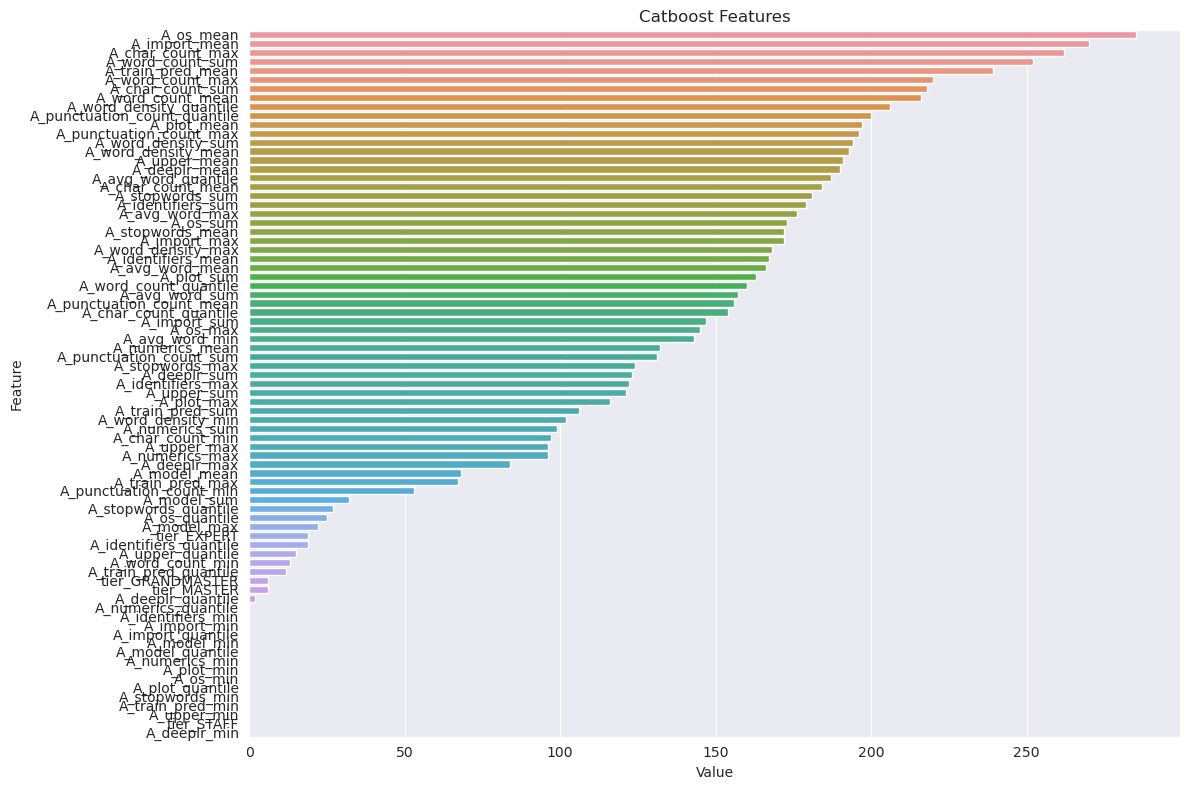

In [130]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

%matplotlib inline
feature_imp = pd.DataFrame(sorted(zip(m.feature_importances_, X.columns), reverse=True)[:200], 
                           columns=['Value','Feature'])
plt.figure(figsize=(12,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('Catboost Features')
plt.tight_layout()
plt.show()

In [131]:
feat_tools = feature_imp['Feature'].values[:250]

Xtest=dftest.drop(['notebook_id','total_execution_time'],axis=1)
Xtest.shape,X.shape

((1594, 79), (2950, 79))

In [132]:
X

,A_word_count_mean,A_word_count_max,A_word_count_sum,A_word_count_min,A_word_count_quantile,A_char_count_mean,A_char_count_max,A_char_count_sum,A_char_count_min,A_char_count_quantile,...,A_train_pred_quantile,A_model_mean,A_model_max,A_model_sum,A_model_min,A_model_quantile,tier_EXPERT,tier_GRANDMASTER,tier_MASTER,tier_STAFF
1,56.880000,1458,2844,1,6.0,240.120000,2911,12006,11,119.0,...,0.0,0.000000,0,0,0,0.0,0,0,0,0
2,5.647059,40,384,1,3.0,85.808824,420,5835,2,64.5,...,0.0,0.000000,0,0,0,0.0,0,0,0,0
6,15.527778,141,559,1,5.0,161.277778,945,5806,13,105.0,...,0.0,0.000000,0,0,0,0.0,0,0,0,0
7,35.326531,217,1731,1,7.0,339.591837,1502,16640,24,164.0,...,0.0,0.346939,6,17,0,0.0,0,0,0,0
9,45.936170,215,2159,1,23.0,413.340426,1253,19427,15,319.0,...,0.0,0.042553,2,2,0,0.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4535,22.758621,735,1980,1,5.0,197.183908,4757,17155,4,66.0,...,0.0,0.000000,0,0,0,0.0,0,0,0,0
4536,11.461538,79,447,1,7.0,128.461538,684,5010,8,91.0,...,0.0,0.102564,2,4,0,0.0,1,0,0,0
4539,64.523810,301,1355,1,31.0,367.333333,1931,7714,4,214.0,...,0.0,0.047619,1,1,0,0.0,0,0,0,0
4540,10.008130,138,1231,1,6.0,109.926829,612,13521,3,77.0,...,0.0,0.113821,1,14,0,0.0,0,0,0,0


In [133]:
err=[]
y_pred_tot=[]
thres = []
X = X[feat_tools]
Xtest = Xtest[feat_tools]
# categorical_features_indices = np.where(X.dtypes =='category')[0]
from sklearn.model_selection import KFold,StratifiedKFold,GroupKFold,GroupShuffleSplit

# fold=StratifiedKFold(n_splits=10,random_state=1994,shuffle=True)
fold=KFold(n_splits=10,random_state=1994,shuffle=True)
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     m=LGBMClassifier(n_estimators=5000,random_state=1994,**params)
    m=LGBMRegressor(n_estimators=5000,random_state=1994,learning_rate=0.05,colsample_bytree=0.3,reg_alpha=10,num_leaves=500)
    
    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)], early_stopping_rounds=200,verbose=500)
    preds=m.predict(X_test,num_iteration=m.best_iteration_)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    
    err.append(np.sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(Xtest,num_iteration=m.best_iteration_)
    y_pred_tot.append(p)

err:  5194.824639639851
err:  5063.2953336299015
err:  4249.076109047967
err:  5609.966335321778
err:  2856.281989382002
err:  3649.915738134386
err:  4746.627373153522
err:  3927.547869037405
err:  4041.4925256627225
err:  4570.120936962413


In [134]:
np.mean(y_pred_tot,0),np.mean(err)

(array([  313.50731402,   129.32237218,   661.41699232, ...,
        10061.6415487 ,    70.78560115,   743.55096312]),
 4390.914884997195)

In [135]:
dftest['total_execution_time']=np.mean(y_pred_tot,0)
dftest[['notebook_id','total_execution_time']].to_csv(f'submissionv1.csv',index=False)

In [136]:
dftest[['notebook_id','total_execution_time']]

,notebook_id,total_execution_time
0,0004d0b59e,313.507314
3,006f52e910,129.322372
4,0070d23b06,661.416992
5,0084ae4bc2,453.432051
8,00ac8ed3b4,69.270898
...,...,...
4532,ff1418e8cc,972.996457
4537,fface8385a,808.316236
4538,ffbd6cbb01,10061.641549
4541,ffeabd223d,70.785601


In [137]:
dftest.reset_index(inplace=True)

In [138]:
dfgpu = pd.read_csv('gpus.csv')
dftest = dftest[['notebook_id','total_execution_time']]

In [139]:
dffinal = pd.concat([dftest,dfgpu],axis=1)
dffinal = dffinal.iloc[:,:-1]
dffinal

,notebook_id,total_execution_time,name,tdp_watts
0,0004d0b59e,313.507314,A100 PCIe 40/80GB,250
1,006f52e910,129.322372,A100 SXM4 80 GB,400
2,0070d23b06,661.416992,AGX Xavier,30
3,0084ae4bc2,453.432051,AMD RX480,150
4,00ac8ed3b4,69.270898,GTX 1080 Ti,250
...,...,...,...,...
1589,ff1418e8cc,972.996457,RTX 3080 TI,350
1590,fface8385a,808.316236,RTX 3090,350
1591,ffbd6cbb01,10061.641549,RTX A4000,140
1592,ffeabd223d,70.785601,RTX A5000,230


In [140]:
def calculate_co2_emissions(df, time_col, gpu_col, co2_per_kwh):

    # Create a new column in the DataFrame to store the total CO2 emissions
    df['total_co2_emissions'] = 0.0
    
    # Loop over the rows of the DataFrame and calculate the total CO2 emissions for each row
    for index, row in df.iterrows():
        # Get the execution time for the current row
        execution_time_sec = row[time_col]
        # Calculate the power consumption of the GPU
        gpu_power = row[gpu_col]
        
        # Convert the power consumption to CO2 emissions
        co2_emissions_per_hour = gpu_power / 1000 * co2_per_kwh
        
        # Calculate the total CO2 emissions for the current row
        total_co2_emissions = co2_emissions_per_hour * (execution_time_sec / 3600)
        
        # Append the total CO2 emissions to the DataFrame
        df.at[index, 'total_co2_emissions'] = total_co2_emissions
    
    return df

In [141]:
dffinal = calculate_co2_emissions(dffinal, 'total_execution_time', 'tdp_watts', 0.91)
dffinal.head()

,notebook_id,total_execution_time,name,tdp_watts,total_co2_emissions
0,0004d0b59e,313.507314,A100 PCIe 40/80GB,250,0.019812
1,006f52e910,129.322372,A100 SXM4 80 GB,400,0.013076
2,0070d23b06,661.416992,AGX Xavier,30,0.005016
3,0084ae4bc2,453.432051,AMD RX480,150,0.017193
4,00ac8ed3b4,69.270898,GTX 1080 Ti,250,0.004378


In [142]:
dffinal.to_csv('results.csv')